In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [21]:
df1 = pd.read_csv("temp_sort_new.csv")

In [22]:
df1 = df1.set_index('time')
df1.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10', 'cond1_off', 'c1_16h', 'c1_16l', 'c1_23h', 'c1_23l', 'c1_30h', 'c1_30l', 'cond2_off', 'c2_16h', 'c2_16l', 'c2_23h', 'c2_23l', 'c2_30h', 'c2_30l']

In [23]:
df = pd.concat([df1])

In [24]:
df

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10,...,c1_23l,c1_30h,c1_30l,cond2_off,c2_16h,c2_16l,c2_23h,c2_23l,c2_30h,c2_30l
time,,,,,,,,,,,,,,,,,,,,,
11.06.2019 16:11,23,23,23,23,24,23,23,24,24,25,...,0,0,0,0,1,0,0,0,0,0
11.06.2019 16:31,23,23,23,24,24,23,23,25,24,25,...,0,0,0,0,0,0,0,0,0,0
11.06.2019 16:51,23,24,24,24,25,24,24,25,25,25,...,0,0,0,0,0,0,0,0,0,1
11.06.2019 17:11,23,24,24,25,25,24,24,25,25,25,...,0,0,0,0,0,0,0,0,0,0
11.06.2019 17:31,22,24,25,25,25,24,24,25,25,25,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.06.2019 8:27,24,22,22,22,23,22,22,23,22,23,...,0,0,0,1,0,0,0,0,0,0
13.06.2019 8:47,24,22,22,22,23,22,22,23,23,23,...,0,0,0,0,0,0,0,0,1,0
13.06.2019 9:07,23,22,22,23,23,22,22,23,23,23,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df['Temp1+1'] = df['Temp1'].shift(-1)
df['Temp2+1'] = df['Temp2'].shift(-1)
df['Temp3+1'] = df['Temp3'].shift(-1)
df['Temp4+1'] = df['Temp4'].shift(-1)
df['Temp5+1'] = df['Temp5'].shift(-1)
df['Temp6+1'] = df['Temp6'].shift(-1)
df['Temp7+1'] = df['Temp7'].shift(-1)
df['Temp8+1'] = df['Temp8'].shift(-1)
df['Temp9+1'] = df['Temp9'].shift(-1)
df['Temp10+1'] = df['Temp10'].shift(-1)

In [26]:
df['Temp1+1'].fillna(24, inplace=True)
df['Temp2+1'].fillna(24, inplace=True)
df['Temp3+1'].fillna(24, inplace=True)
df['Temp4+1'].fillna(24, inplace=True)
df['Temp5+1'].fillna(24, inplace=True)
df['Temp6+1'].fillna(24, inplace=True)
df['Temp7+1'].fillna(24, inplace=True)
df['Temp8+1'].fillna(24, inplace=True)
df['Temp9+1'].fillna(24, inplace=True)
df['Temp10+1'].fillna(24, inplace=True)

In [27]:
x = df.drop(['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1'], axis = 1)
y = df[['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1']]

y=np.reshape(y.values, (-1,10))

scaler_x = MinMaxScaler()
print(scaler_x.fit(x))
scaler_y = MinMaxScaler()
print(scaler_y.fit(y))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Variants

In [28]:
X_train = scaler_x.transform(x)
y_train = scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

xscale=scaler_x.transform(x)
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, train_size = 1)

# Neural Link

In [29]:
model = Sequential()
model.add(Dense(124, input_dim=24, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='linear'))
model.summary()
# Use a custom metricfunction

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

fit = model.fit(X_train, y_train, epochs=1000,  verbose=1, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 124)               3100      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8000      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 11,750
Trainable params: 11,750
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.2472 - mse: 0.2472 - val_loss: 0.1895 - val_mse: 0.1895
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2000 - mse: 0.2000 - val_loss: 0.1505 - val_mse: 0.1505
Epoch 3/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1595 - mse: 0.1595 - val_loss: 0.1155 - val

Epoch 57/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 58/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 59/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 60/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 61/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 62/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 63/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 64/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.

Epoch 119/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 120/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 121/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 122/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 123/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 124/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 125/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 126/1000
2/2 [==============================] - 0s 12ms/step - 

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 181/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 182/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 183/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 184/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 185/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 186/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 187/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - 

Epoch 242/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 243/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 244/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 245/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 246/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 247/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 248/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 249/1000
2/2 [==============================] - 0s 11ms/step - 

2/2 [==============================] - 0s 12ms/step - loss: 9.6329e-04 - mse: 9.6329e-04 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 303/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.5169e-04 - mse: 9.5169e-04 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 304/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.6345e-04 - mse: 9.6345e-04 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 305/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.4917e-04 - mse: 9.4917e-04 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 306/1000
2/2 [==============================] - 0s 11ms/step - loss: 9.2963e-04 - mse: 9.2963e-04 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 307/1000
2/2 [==============================] - 0s 14ms/step - loss: 9.4754e-04 - mse: 9.4754e-04 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 308/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.2219e-04 - mse: 9.2219e-04 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 309/1000
2/2 [========

Epoch 360/1000
2/2 [==============================] - 0s 12ms/step - loss: 7.2356e-04 - mse: 7.2356e-04 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 361/1000
2/2 [==============================] - 0s 11ms/step - loss: 7.2329e-04 - mse: 7.2329e-04 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 362/1000
2/2 [==============================] - 0s 12ms/step - loss: 7.2488e-04 - mse: 7.2488e-04 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 363/1000
2/2 [==============================] - 0s 12ms/step - loss: 7.1943e-04 - mse: 7.1943e-04 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 364/1000
2/2 [==============================] - 0s 11ms/step - loss: 7.1319e-04 - mse: 7.1319e-04 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 365/1000
2/2 [==============================] - 0s 12ms/step - loss: 7.1039e-04 - mse: 7.1039e-04 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 366/1000
2/2 [==============================] - 0s 12ms/step - loss: 7.2021e-04 - mse: 7.2021e-04 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 367/100

2/2 [==============================] - 0s 12ms/step - loss: 5.7268e-04 - mse: 5.7268e-04 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 419/1000
2/2 [==============================] - 0s 13ms/step - loss: 5.6477e-04 - mse: 5.6477e-04 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 420/1000
2/2 [==============================] - 0s 13ms/step - loss: 5.7122e-04 - mse: 5.7122e-04 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 421/1000
2/2 [==============================] - 0s 12ms/step - loss: 5.6181e-04 - mse: 5.6181e-04 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 422/1000
2/2 [==============================] - 0s 13ms/step - loss: 5.6155e-04 - mse: 5.6155e-04 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 423/1000
2/2 [==============================] - 0s 13ms/step - loss: 5.5845e-04 - mse: 5.5845e-04 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 424/1000
2/2 [==============================] - 0s 11ms/step - loss: 5.5834e-04 - mse: 5.5834e-04 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 425/1000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 4.4238e-04 - mse: 4.4238e-04 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 477/1000
2/2 [==============================] - 0s 12ms/step - loss: 4.4372e-04 - mse: 4.4372e-04 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 478/1000
2/2 [==============================] - 0s 11ms/step - loss: 4.3996e-04 - mse: 4.3996e-04 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 479/1000
2/2 [==============================] - 0s 12ms/step - loss: 4.3480e-04 - mse: 4.3480e-04 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 480/1000
2/2 [==============================] - 0s 11ms/step - loss: 4.4261e-04 - mse: 4.4261e-04 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 481/1000
2/2 [==============================] - 0s 11ms/step - loss: 4.3354e-04 - mse: 4.3354e-04 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 482/1000
2/2 [==============================] - 0s 11ms/step - loss: 4.4551e-04 - mse: 4.4551e-04 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 483/1000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 3.3813e-04 - mse: 3.3813e-04 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 535/1000
2/2 [==============================] - 0s 12ms/step - loss: 3.3914e-04 - mse: 3.3914e-04 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 536/1000
2/2 [==============================] - 0s 11ms/step - loss: 3.3815e-04 - mse: 3.3815e-04 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 537/1000
2/2 [==============================] - 0s 12ms/step - loss: 3.4230e-04 - mse: 3.4230e-04 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 538/1000
2/2 [==============================] - 0s 12ms/step - loss: 3.4508e-04 - mse: 3.4508e-04 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 539/1000
2/2 [==============================] - 0s 12ms/step - loss: 3.4280e-04 - mse: 3.4280e-04 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 540/1000
2/2 [==============================] - 0s 12ms/step - loss: 3.3934e-04 - mse: 3.3934e-04 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 541/1000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 2.6221e-04 - mse: 2.6221e-04 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 592/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.6520e-04 - mse: 2.6520e-04 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 593/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.6212e-04 - mse: 2.6212e-04 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 594/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.6651e-04 - mse: 2.6651e-04 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 595/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.7523e-04 - mse: 2.7523e-04 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 596/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.6489e-04 - mse: 2.6489e-04 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 597/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.7030e-04 - mse: 2.7030e-04 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 598/1000
2/2 [========

Epoch 649/1000
2/2 [==============================] - 0s 11ms/step - loss: 1.9547e-04 - mse: 1.9547e-04 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 650/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9469e-04 - mse: 1.9469e-04 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 651/1000
2/2 [==============================] - 0s 11ms/step - loss: 1.9545e-04 - mse: 1.9545e-04 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 652/1000
2/2 [==============================] - 0s 10ms/step - loss: 1.8981e-04 - mse: 1.8981e-04 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 653/1000
2/2 [==============================] - 0s 11ms/step - loss: 1.9361e-04 - mse: 1.9361e-04 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 654/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9534e-04 - mse: 1.9534e-04 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 655/1000
2/2 [==============================] - 0s 11ms/step - loss: 1.9260e-04 - mse: 1.9260e-04 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 656/100

2/2 [==============================] - 0s 12ms/step - loss: 1.3882e-04 - mse: 1.3882e-04 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 708/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3802e-04 - mse: 1.3802e-04 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 709/1000
2/2 [==============================] - 0s 11ms/step - loss: 1.3663e-04 - mse: 1.3663e-04 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 710/1000
2/2 [==============================] - 0s 11ms/step - loss: 1.3855e-04 - mse: 1.3855e-04 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 711/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3662e-04 - mse: 1.3662e-04 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 712/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3365e-04 - mse: 1.3365e-04 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 713/1000
2/2 [==============================] - 0s 11ms/step - loss: 1.3414e-04 - mse: 1.3414e-04 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 714/1000
2/2 [========

Epoch 765/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.5727e-05 - mse: 9.5727e-05 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 766/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.4626e-05 - mse: 9.4626e-05 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 767/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.4352e-05 - mse: 9.4352e-05 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 768/1000
2/2 [==============================] - 0s 11ms/step - loss: 9.3903e-05 - mse: 9.3903e-05 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 769/1000
2/2 [==============================] - 0s 11ms/step - loss: 9.2668e-05 - mse: 9.2668e-05 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 770/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.4207e-05 - mse: 9.4207e-05 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 771/1000
2/2 [==============================] - 0s 12ms/step - loss: 9.1767e-05 - mse: 9.1767e-05 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 772/100

Epoch 823/1000
2/2 [==============================] - 0s 12ms/step - loss: 6.6917e-05 - mse: 6.6917e-05 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 824/1000
2/2 [==============================] - 0s 11ms/step - loss: 6.7053e-05 - mse: 6.7053e-05 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 825/1000
2/2 [==============================] - 0s 12ms/step - loss: 6.6577e-05 - mse: 6.6577e-05 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 826/1000
2/2 [==============================] - 0s 11ms/step - loss: 6.6763e-05 - mse: 6.6763e-05 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 827/1000
2/2 [==============================] - 0s 11ms/step - loss: 6.5482e-05 - mse: 6.5482e-05 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 828/1000
2/2 [==============================] - 0s 11ms/step - loss: 6.5084e-05 - mse: 6.5084e-05 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 829/1000
2/2 [==============================] - 0s 12ms/step - loss: 6.3862e-05 - mse: 6.3862e-05 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 830/100

2/2 [==============================] - 0s 12ms/step - loss: 5.0999e-05 - mse: 5.0999e-05 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 881/1000
2/2 [==============================] - 0s 14ms/step - loss: 4.9737e-05 - mse: 4.9737e-05 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 882/1000
2/2 [==============================] - ETA: 0s - loss: 4.9524e-05 - mse: 4.9524e-0 - 0s 12ms/step - loss: 4.7596e-05 - mse: 4.7596e-05 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 883/1000
2/2 [==============================] - 0s 14ms/step - loss: 4.7657e-05 - mse: 4.7657e-05 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 884/1000
2/2 [==============================] - 0s 11ms/step - loss: 4.6592e-05 - mse: 4.6592e-05 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 885/1000
2/2 [==============================] - 0s 11ms/step - loss: 4.6586e-05 - mse: 4.6586e-05 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 886/1000
2/2 [==============================] - 0s 11ms/step - loss: 4.5793e-05 - mse: 4.5793e-05 - val_loss: 0.0212 

2/2 [==============================] - 0s 11ms/step - loss: 3.3776e-05 - mse: 3.3776e-05 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 938/1000
2/2 [==============================] - 0s 12ms/step - loss: 3.4885e-05 - mse: 3.4885e-05 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 939/1000
2/2 [==============================] - 0s 14ms/step - loss: 3.3279e-05 - mse: 3.3279e-05 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 940/1000
2/2 [==============================] - 0s 11ms/step - loss: 3.3526e-05 - mse: 3.3526e-05 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 941/1000
2/2 [==============================] - 0s 13ms/step - loss: 3.3092e-05 - mse: 3.3092e-05 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 942/1000
2/2 [==============================] - 0s 11ms/step - loss: 3.2786e-05 - mse: 3.2786e-05 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 943/1000
2/2 [==============================] - 0s 11ms/step - loss: 3.2262e-05 - mse: 3.2262e-05 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 944/1000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 2.5542e-05 - mse: 2.5542e-05 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 995/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.5842e-05 - mse: 2.5842e-05 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 996/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.4774e-05 - mse: 2.4774e-05 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 997/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.4280e-05 - mse: 2.4280e-05 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 998/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.4426e-05 - mse: 2.4426e-05 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 999/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.3767e-05 - mse: 2.3767e-05 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 1000/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.4712e-05 - mse: 2.4712e-05 - val_loss: 0.0221 - val_mse: 0.0221


# Testing and Experiments

In [31]:
print(scaler_x.inverse_transform(X_test[0:1]))
ynew= model.predict(X_test)
result = pd.DataFrame(scaler_y.inverse_transform(ynew[0:1]))
print((result))

[[25. 22. 22. 22. 22. 22. 21. 23. 22. 22.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  1.  0.  0.]]
           0          1          2         3          4          5          6  \
0  25.772295  21.912994  21.836983  21.71509  22.229084  21.521744  21.643696   

           7          8         9  
0  24.258997  22.451366  22.92214  


# Visualizations

In [15]:
def plot_train_history(history, title):
  mpl.rcParams['figure.figsize'] = (8, 6)
  mpl.rcParams['axes.grid'] = False
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(loss))

  y = []
  for i in epochs:
        y.append(0)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.plot(epochs, y, 'g', label='y = 0 axis')
  plt.xlabel('Epochs')
  plt.ylabel('MSE value or Losses')
    
  plt.title(title)
  plt.legend()

  plt.show()

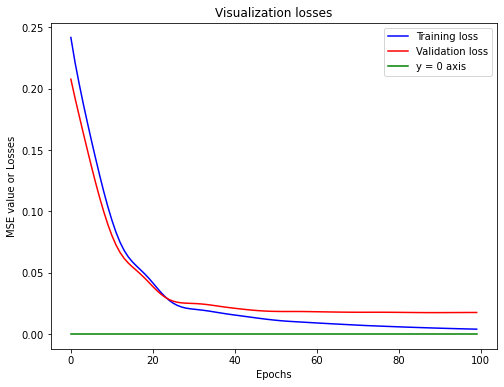

In [16]:
plot_train_history(fit,
                   'Visualization losses')